In [ ]:
# Career Recommendation Validation

import pandas as pd

#load the cleaned dataset
df = pd.read_csv("artifacts/cleaned/employee_full_clean.csv")

# make sure salary column is numeric
df["salary_in_thousands"] = pd.to_numeric(df["salary_in_thousands"], errors="coerce")

print("Dataset loaded:", df.shape)
print("Industries:", df["industry"].unique()[:10])


/var/folders/ty/gr5gbjnd40bfmk_tt8pl9dnm0000gn/T/ipykernel_36254/1847396191.py:8: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("artifacts/cleaned/employee_full_clean.csv")


Dataset loaded: (999895, 12)
Industries: ['HEALTH' 'WEB' 'EDUCATION' 'OIL' 'FINANCE' 'AUTO' 'SERVICE' 'GOVERNMENT']


In [ ]:
#median salary by industry (sorted high to low)
industry_salary = (
    df.groupby("industry")["salary_in_thousands"]
      .median()
      .sort_values(ascending=False)
      .reset_index()
)

print("\n=== Median Salary by Industry ===")
print(industry_salary)



=== Median Salary by Industry ===
     industry  salary_in_thousands
0     FINANCE                128.0
1         OIL                128.0
2         WEB                119.0
3      HEALTH                114.0
4        AUTO                108.0
5     SERVICE                103.0
6   EDUCATION                 98.0
7  GOVERNMENT                 81.0


In [ ]:
REF = 114.0  # global median from EDA

below_114 = (
    df.assign(below=df["salary_in_thousands"] < REF)
      .groupby("industry")["below"]
      .mean()
      .mul(100)
      .round(1)
      .reset_index()
      .sort_values("below")
      .rename(columns={"below": "%_below_114k"})
)

print("\n=== % of Employees Below $114k by Industry ===")
print(below_114)



=== % of Employees Below $114k by Industry ===
     industry  %_below_114k
2     FINANCE          34.7
5         OIL          34.7
7         WEB          43.8
4      HEALTH          49.7
0        AUTO          56.4
6     SERVICE          61.7
1   EDUCATION          66.9
3  GOVERNMENT         100.0


In [5]:
focus = df[df["industry"].isin(["WEB", "FINANCE", "HEALTH"])]

focus_stats = (
    focus.groupby("industry")["salary_in_thousands"]
         .agg(["median", "mean", "count"])
         .round(1)
         .reset_index()
         .rename(columns={"count": "n_employees"})
)

print("\n=== Focus Industry Comparison (Web vs Finance vs Health) ===")
print(focus_stats)



=== Focus Industry Comparison (Web vs Finance vs Health) ===
  industry  median   mean  n_employees
0  FINANCE   128.0  130.7       142804
1   HEALTH   114.0  115.7       142680
2      WEB   119.0  121.6       143288


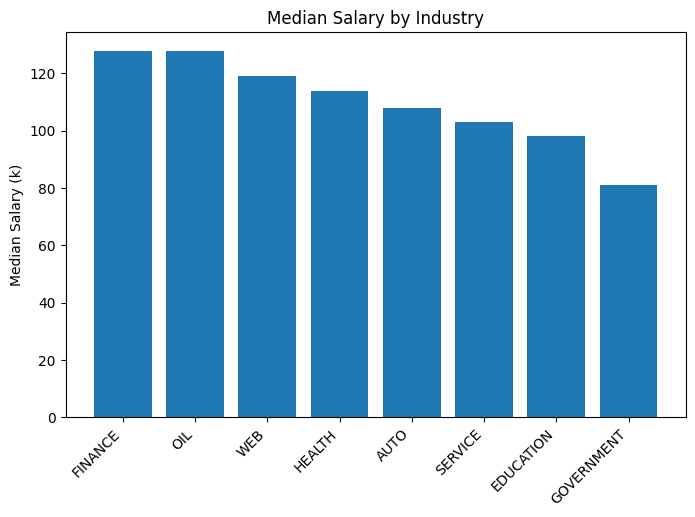

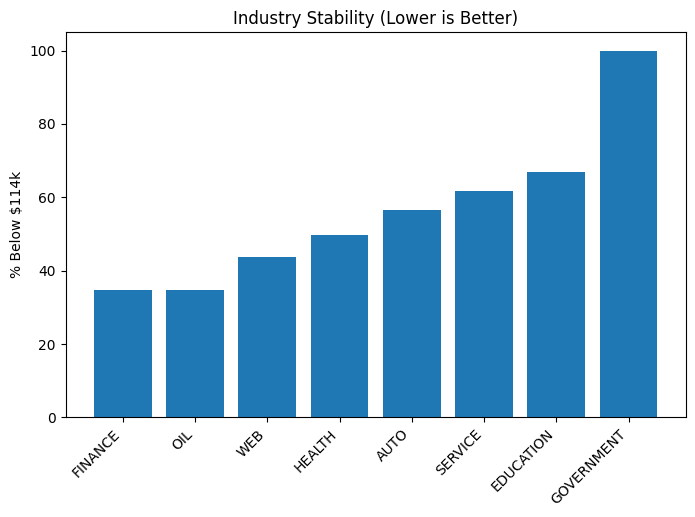

In [ ]:
import matplotlib.pyplot as plt

# bar chart for median salaries
plt.figure(figsize=(8,5))
plt.bar(industry_salary["industry"], industry_salary["salary_in_thousands"])
plt.xticks(rotation=45, ha="right")
plt.ylabel("Median Salary (k)")
plt.title("Median Salary by Industry")
plt.show()

# bar chart for % below 114k
plt.figure(figsize=(8,5))
plt.bar(below_114["industry"], below_114["%_below_114k"])
plt.xticks(rotation=45, ha="right")
plt.ylabel("% Below $114k")
plt.title("Industry Stability (Lower is Better)")
plt.show()


# Career Recommendation Justification (Based on EDA & Code Validation)

### Code Results Recap
1. **Median Salary by Industry**
   - Finance: 128k  
   - Oil: 128k  
   - Web: 119k  
   - Health: 114k  
   - Service: 103k  
   - Education: 98k  
   - Government: 81k  

2. **% of Employees Below Global Median ($114k)**
   - Finance: 34.7%  
   - Oil: 34.7%  
   - Web: 43.8%  
   - Health: 49.7%  
   - Service: 61.7%  
   - Education: 66.9%  
   - Government: 100%  

3. **Focused Comparison (Web vs Finance vs Health)**
   - Finance → Median 128k, Mean 130.7k  
   - Web → Median 119k, Mean 121.6k  
   - Health → Median 114k, Mean 115.7k  

---

### Explanation
The validation results confirm that **Finance** is the strongest option:
- **Highest median salary (128k)**, ahead of Web (119k) and Health (114k).  
- **Lowest risk** with only 34.7% of employees below $114k (compared to 43.8% in Web and 49.7% in Health).  
- This stability is crucial given the individual’s financial commitments.  

**Web**, though familiar, is volatile with higher retrenchment risk.  
**Health** is a good **secondary option**: stable demand, meaningful work, but slightly less secure financially.  

**Service and Education** are not viable — both fall well below $114k, with over 60% of employees below the threshold.  

---

### 🧭 Final Recommendation
- **Primary Industry**: **Finance (FinTech, Banking Data Engineering, Risk Analytics)**  
  → Strong salary, lowest % below-median, direct fit for data/AI skills.  

- **Secondary Industry**: **HealthTech / Healthcare Analytics**  
  → Stable demand, meaningful societal impact, reasonable but weaker salary stability.  

- **Avoid**: Service, Education, Government (low salaries, high risk).  
- **Caution**: Web — only viable in large, stable firms (avoid startups).  
